In [1]:
from halp.directed_hypergraph import DirectedHypergraph

from halp.algorithms.directed_paths import shortest_b_tree
import networkx as nx

In [2]:
# Define directed hypergraph from overleaf example
H = DirectedHypergraph()
H.add_hyperedge([1], [2, 3]) #, label="E1")
H.add_hyperedge([2], [4, 5]) #, label="E2")
H.add_hyperedge([2,3], [6, 7]) #, label="E3")
H.add_hyperedge([5, 6], [10]) #, label="E4")
H.add_hyperedge([8, 9, 10], [4]) #, label="E5")
H.add_hyperedge([11], [12]) #, label="E6")
H.add_hyperedge([12, 13], [11]) #, label="E7")

'e7'

In [3]:
H = DirectedHypergraph()
H.add_hyperedge([1], [2]) # 1
H.add_hyperedge([1], [3]) # 2
H.add_hyperedge([2], [4]) # 3
H.add_hyperedge([3, 4], [6]) # 4
H.add_hyperedge([2], [5]) # 5
H.add_hyperedge([2], [8]) # 6
H.add_hyperedge([6, 7], [9]) # 7
H.add_hyperedge([9], [12]) # 8
H.add_hyperedge([12], [13]) # 9
H.add_hyperedge([12], [14]) # 10

H.add_hyperedge([8], [11]) # 11
H.add_hyperedge([1], [10]) # 12
H.add_hyperedge([1], [21]) # 13
H.add_hyperedge([12, 21], [28]) # 14
H.add_hyperedge([1, 13], [16]) # 15
H.add_hyperedge([11, 10], [15]) # 16
H.add_hyperedge([15], [17]) # 17
H.add_hyperedge([16, 30, 14, 17], [18]) # 18
H.add_hyperedge([1, 18], [20]) # 19
H.add_hyperedge([1], [22]) # 20

H.add_hyperedge([22], [25]) # 21
H.add_hyperedge([22], [23]) # 22
H.add_hyperedge([22], [24]) # 23
H.add_hyperedge([25], [26]) # 24
H.add_hyperedge([23, 24], [27]) # 25
H.add_hyperedge([26, 27], [29]) # 26
H.add_hyperedge([28, 29], [30]) # 27

H.add_hyperedge([5], [7])

'e28'

# Demonstration SBT Algorithm

In [4]:
id_source_vertex = 1
mapping, weight_dict = shortest_b_tree(H, id_source_vertex)

In [5]:
# mapping: dict: keys (int): vertices ids, values (strings): id of the last hyperedge on the shortest B-path that connects id_source_vertex and the key.
print(mapping)

{1: None, 2: 'e1', 3: 'e2', 4: 'e3', 5: 'e5', 6: 'e4', 7: 'e28', 8: 'e6', 9: 'e7', 10: 'e12', 11: 'e11', 12: 'e8', 13: 'e9', 14: 'e10', 15: 'e16', 16: 'e15', 17: 'e17', 18: 'e18', 20: 'e19', 21: 'e13', 22: 'e20', 23: 'e22', 24: 'e23', 25: 'e21', 26: 'e24', 27: 'e25', 28: 'e14', 29: 'e26', 30: 'e27'}


In [6]:
# weight_dict: dict: keys (int): vertices ids, values (int): weight that the SBT algorithm assigns to each vertex.
print(weight_dict)

{1: 0, 2: 1, 3: 1, 4: 2, 5: 2, 6: 4, 7: 3, 8: 2, 9: 8, 10: 1, 11: 3, 12: 9, 13: 10, 14: 10, 15: 5, 16: 11, 17: 6, 18: 49, 20: 50, 21: 1, 22: 1, 23: 2, 24: 2, 25: 2, 26: 3, 27: 5, 28: 11, 29: 9, 30: 21}


# Extract Tree for HLD Algorithm

In [7]:
def calculate_tree(id_source_vertex: int):
    """
    Calculates the tree that we want to input in the HLD PathGES algorithm.
    Parameters:
        id_source_vertex (int): The id of the source vertex.
    """

    # Runs the SBT algorithm for vertex "id_source_vertex" as source.
    mapping, weight_dict = shortest_b_tree(H, id_source_vertex)
    # mapping: dict: keys (int): vertices ids, values (strings): id of the last hyperedge on the shortest B-path that connects id_source_vertex and the key.
    # weight_dict: dict: keys (int): vertices ids, values (int): weight that the SBT algorithm assigns to each vertex.

    # Tree that we will input in the HLD PathGES algorithm.
    tree = nx.DiGraph()
    for vertex_id in mapping.keys():
        hyperedge_id = mapping[vertex_id]
        if hyperedge_id is None:
            continue

        tail_vertex_id_list = H.get_hyperedge_tail(hyperedge_id)
        weight_tail_nodes = [weight_dict[vertex_id] for vertex_id in tail_vertex_id_list]
        node_id_maximal_weight = tail_vertex_id_list[weight_tail_nodes.index(max(weight_tail_nodes))]

        tree.add_edge(node_id_maximal_weight, vertex_id)

    return tree

In [8]:
def draw_tree(tree, id_source_vertex):
    colors = ['red' if node == id_source_vertex else 'lightblue' for node in tree.nodes()]
    nx.draw(tree, with_labels=True, node_color=colors)

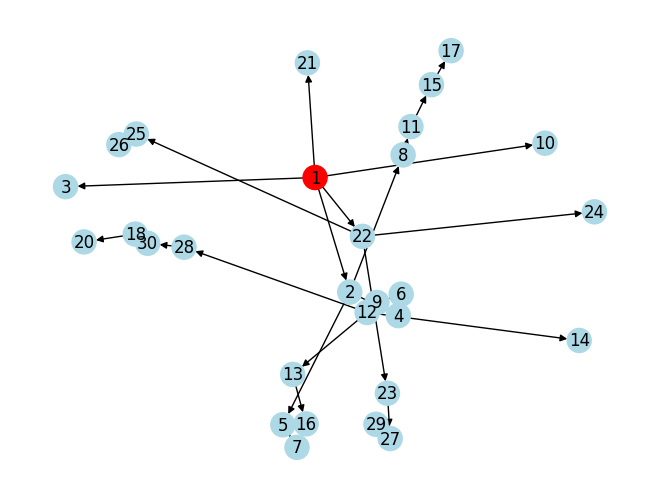

In [9]:
id_source_vertex = 1
tree = calculate_tree(id_source_vertex)
draw_tree(tree, id_source_vertex)

In [10]:
mapping, weight_dict = shortest_b_tree(H, 1)

In [18]:
mapping[3]

'e2'